# Objectif

Le Spaceship Titanic est un paquebot interstellaire lancé il y a un mois. Avec près de 13 000 passagers à bord, le vaisseau a entamé son voyage en transportant des émigrants de notre système solaire vers trois exoplanètes nouvellement habitables en orbite autour d'étoiles proches.
Alors qu'il contournait Alpha Centauri en route vers sa première destination, 55 Cancri E, le vaisseau spatial Titanic est entré en collision avec une anomalie spatio-temporelle cachée dans un nuage de poussière. Malheureusement, il a connu le même sort que son homonyme 1000 ans plus tôt. Bien que le navire soit resté intact, près de la moitié des passagers ont été transportés dans une autre dimension. 
Pour retrouver les passagers perdus, nous devons prédire quels passagers ont été transportés par l'anomalie à l'aide des enregistrements récupérés dans le système informatique endommagé du vaisseau spatial.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("./train.csv", sep=',')
realtest= pd.read_csv("./test.csv", sep=',')


# Observation et description des données 

In [2]:
print(type(data))     
data.head()

<class 'pandas.core.frame.DataFrame'>


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
realtest.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
#Eliminer les éventuels duplicats
print(data.shape)
data = data.drop_duplicates()    
print(data.shape)

(8693, 14)
(8693, 14)


In [7]:
print("Description du set de training")
print(data.select_dtypes(object).columns)
for i in data.select_dtypes(object).columns:
    print(i, ": nombre de valeurs uniques:", len(data[i].unique()))  
    print(i, "valeur la plus fréquente:", data[i].mode([1]).tolist()[0])
    
print("\n Description du set de test")
for i in realtest.select_dtypes(object).columns:
    print(i, ": nombre de valeurs uniques:", len(realtest[i].unique()))  
    print(i, "valeur la plus fréquente:", realtest[i].mode([1]).tolist()[0])

Description du set de training
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')
PassengerId : nombre de valeurs uniques: 8693
PassengerId valeur la plus fréquente: 0001_01
HomePlanet : nombre de valeurs uniques: 4
HomePlanet valeur la plus fréquente: Earth
CryoSleep : nombre de valeurs uniques: 3
CryoSleep valeur la plus fréquente: False
Cabin : nombre de valeurs uniques: 6561
Cabin valeur la plus fréquente: G/734/S
Destination : nombre de valeurs uniques: 4
Destination valeur la plus fréquente: TRAPPIST-1e
VIP : nombre de valeurs uniques: 3
VIP valeur la plus fréquente: False
Name : nombre de valeurs uniques: 8474
Name valeur la plus fréquente: Alraium Disivering

 Description du set de test
PassengerId : nombre de valeurs uniques: 4277
PassengerId valeur la plus fréquente: 0013_01
HomePlanet : nombre de valeurs uniques: 4
HomePlanet valeur la plus fréquente: Earth
CryoSleep : nombre de valeurs uniques: 3
CryoSleep v

In [8]:
#catégories d'age
age_groups = pd.cut(data['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, np.inf])
data.groupby(age_groups)['Age'].count()

Age
(0.0, 10.0]      540
(10.0, 20.0]    1717
(20.0, 30.0]    2668
(30.0, 40.0]    1680
(40.0, 50.0]     994
(50.0, 60.0]     517
(60.0, 70.0]     183
(70.0, inf]       37
Name: Age, dtype: int64

<AxesSubplot:title={'center':'percentage of people transported in the train set'}, ylabel='Transported'>

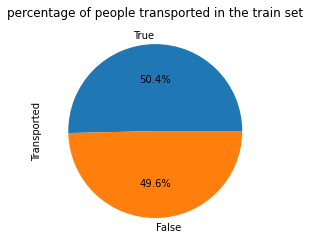

In [9]:
#Répartition des étiquettes dans le set de training
data["Transported"].value_counts().plot(kind='pie', autopct='%1.1f%%', title='percentage of people transported in the train set')

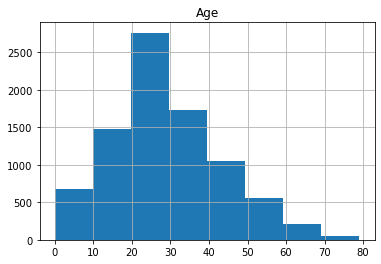

In [10]:
data_age = pd.DataFrame({
    'Age':data['Age'],
     })
dhist = data_age.hist(bins=8)

[Text(0.5, 1.0, 'People transported or not by age range in train set')]

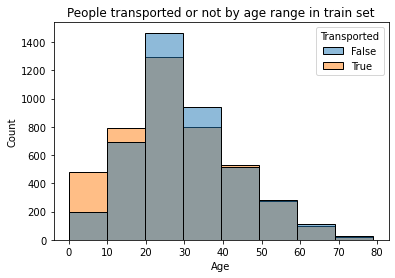

In [11]:
import seaborn as sns
sns.histplot(x="Age", data=data, hue="Transported", bins=8).set(title='People transported or not by age range in train set')

[Text(0.5, 1.0, 'People transported or not by Homeplanet')]

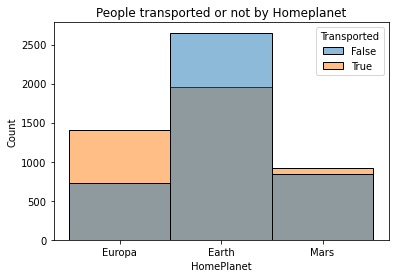

In [12]:
sns.histplot(x="HomePlanet", data=data, hue="Transported").set(title='People transported or not by Homeplanet')

[Text(0.5, 1.0, 'People transported or not by destination')]

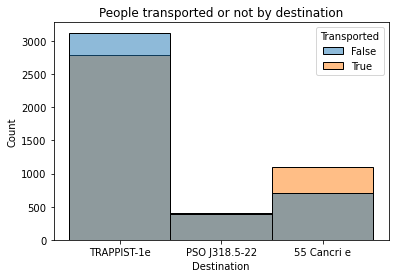

In [13]:
sns.histplot(x="Destination", data=data, hue="Transported").set(title='People transported or not by destination')

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  Cryo_False  Cryo_True  
0        False           1          0  
1         True          

[Text(0.5, 1.0, 'People transported or not by Cryosleep status')]

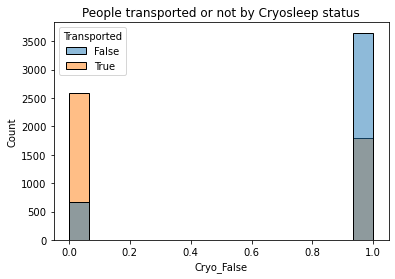

In [14]:
# Ici on ne fait du onehotencoding que sur une seule variable catégorielle, donc on nomme le dataframe data2, 
# on ne se servira plus de data_2 par la suite, là c'est juste pour représenter 
# sous forme graphique le lien entre la variable "Transported" et "CryoSleep"

data_cryo_ohe=pd.get_dummies(data['CryoSleep'], prefix='Cryo')
data_2=pd.concat([data, data_cryo_ohe], axis=1, join='inner')
print(data_2.head())
data_2 = data_2.drop('CryoSleep',axis = 1)
print(data_2.head())
sns.histplot(x="Cryo_False", data=data_2, hue="Transported").set(title='People transported or not by Cryosleep status')

Alors que les 2 classes sont équilibrées (50.4% de transported, 49.6% de non transported), 
les individus cryogénisés tendent à etre plus "transported" que les non cryogénisés. 

In [15]:
#Nombre de valeurs manquantes
print("donnees manquantes dans le train set:", data.isnull().sum())
print("\n donnees manquantes dans le test set:", realtest.isnull().sum())

donnees manquantes dans le train set: PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

 donnees manquantes dans le test set: PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


# Pretraitement des données

Il y a beaucoup de valeurs manquantes dans le training et le test set
On va les gérer différemment, comme expliqué ci-dessous : 

In [16]:
#Gérer les valeurs manquantes 
# en cas de NAN sur les dépenses d'argent, on considère que les gens cryogénisés
# n'ont pas dépensé d'argent, et que pour les non cryogénisés on attribue une dépense moyenne

data_new=data.copy(deep=True)
data_new.replace('', np.nan, inplace=True)
att={"RoomService": 7, "FoodCourt": 8, "ShoppingMall": 9, "Spa": 10, "VRDeck": 11}
for key,value in att.items():
    i=int(value)
    for j in range(data_new.shape[0]):
        if ((data_new.iloc[j,2]) and (np.isnan(data_new.iloc[j,i]))):
            data_new.iloc[j,i]=0
        elif ((data_new.iloc[j,2]==False) and (np.isnan(data_new.iloc[j,i]))):
            data_new.iloc[j,i]=np.round((data_new[key].sum())/(np.where(data_new[key]>-0.1, 1, 0).sum()))  
        elif (np.isnan(data_new.iloc[j,i])):
            data_new.iloc[j,i]=np.round((data_new[key].sum())/(np.where(data_new[key]>-0.1, 1, 0).sum()))            
print(data_new.iloc[[59]])

#quand l'age est manquant on attribue l'age moyen
att2={"Age": 5}
for key,value in att2.items():
    i=value
    for j in range(data_new.shape[0]):
        if np.isnan(data_new.iloc[j,i]):
            data_new.iloc[j,i]=data_new.iloc[:,5].mean()
print(data_new.iloc[[566]])

#Même traitement pour les données test
realtest_new=realtest.copy(deep=True)
realtest_new.replace('', np.nan, inplace=True)

for key,value in att.items():
    i=int(value)
    for j in range(realtest_new.shape[0]):
        if ((realtest_new.iloc[j,2]) and (np.isnan(realtest_new.iloc[j,i]))):
            realtest_new.iloc[j,i]=0
        elif ((realtest_new.iloc[j,2]==False) and (np.isnan(realtest_new.iloc[j,i]))):
            realtest_new.iloc[j,i]=np.round((realtest_new[key].sum())/(np.where(realtest_new[key]>-0.1, 1, 0).sum()))  
        elif (np.isnan(realtest_new.iloc[j,i])):
            realtest_new.iloc[j,i]=np.round((realtest_new[key].sum())/(np.where(realtest_new[key]>-0.1, 1, 0).sum()))            

#quand l'age est manquant on attribue l'age moyen
att2={"Age": 5}
for key,value in att2.items():
    i=value
    for j in range(realtest_new.shape[0]):
        if np.isnan(realtest_new.iloc[j,i]):
            realtest_new.iloc[j,i]=realtest_new.iloc[:,5].mean()


   PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
59     0064_02        NaN      True  E/3/S  TRAPPIST-1e  33.0  False   

    RoomService  FoodCourt  ShoppingMall  Spa  VRDeck         Name  \
59          0.0        0.0           0.0  0.0     0.0  Colatz Keen   

    Transported  
59         True  
    PassengerId HomePlanet CryoSleep   Cabin  Destination       Age  VIP  \
566     0593_01       Mars     False  D/24/P  TRAPPIST-1e  28.82793  NaN   

     RoomService  FoodCourt  ShoppingMall  Spa  VRDeck     Name  Transported  
566         43.0      152.0         182.0  1.0  2005.0  Hon Kra        False  


In [17]:
#pour les variables catégorielles en cas de NAN on attribue la valeur la plus fréquente
for j in range(data_new.shape[0]):
    if pd.isna(data_new.iloc[j,1]):
        data_new.iloc[j,1]=data_new.iloc[:,1].mode([1]).tolist()[0]
# print((data_new.iloc[:,1].mode([1])).tolist()[0])
    if pd.isna(data_new.iloc[j,2]):
        data_new.iloc[j,2]=data_new.iloc[:,2].mode([1]).tolist()[0]
    if pd.isna(data_new.iloc[j,4]):
        data_new.iloc[j,4]=data_new.iloc[:,4].mode([1]).tolist()[0]
    if pd.isna(data_new.iloc[j,6]):
        data_new.iloc[j,6]=data_new.iloc[:,6].mode([1]).tolist()[0]

# print(data_new.iloc[[38, 568]])

#Même traitement pour les données test
for j in range(realtest_new.shape[0]):
    if pd.isna(realtest_new.iloc[j,1]):
        realtest_new.iloc[j,1]=realtest_new.iloc[:,1].mode([1]).tolist()[0]
# print((data_new.iloc[:,1].mode([1])).tolist()[0])
    if pd.isna(realtest_new.iloc[j,2]):
        realtest_new.iloc[j,2]=realtest_new.iloc[:,2].mode([1]).tolist()[0]
    if pd.isna(realtest_new.iloc[j,4]):
        realtest_new.iloc[j,4]=realtest_new.iloc[:,4].mode([1]).tolist()[0]
    if pd.isna(realtest_new.iloc[j,6]):
        realtest_new.iloc[j,6]=realtest_new.iloc[:,6].mode([1]).tolist()[0]
# print(realtest_new.iloc[[42]])


In [18]:
#séparer en 3 l"information cabine (deck, numero et side)
data_new[['Deck_Cabin', 'Num_Cabin', 'Side_Cabin']] = data_new["Cabin"].apply(lambda x: pd.Series(str(x).split("/")))
data_new.replace('', np.NaN, inplace=True)
print(data_new.iloc[[10, 11, 12, 13, 14, 15]])
#on remplace les valeurs "nan" dans Deck_Cabin qui sont apparues à cause du split
print("check", np.where(data_new["Deck_Cabin"]=="nan", 1, 0).sum())
data_new["Deck_Cabin"].replace("nan", np.NaN, inplace=True)

for j in range(data_new.shape[0]):
    if pd.isna(data_new.iloc[j,14]):
        data_new.iloc[j,14]=data_new.iloc[:,14].mode([1]).tolist()[0]
    if pd.isna(data_new.iloc[j,16]):
        data_new.iloc[j,16]=data_new.iloc[:,16].mode([1]).tolist()[0]
        
#Déplacer la colonne transported pour qu'elle soit la dernière colonne
lab = data_new.pop('Transported')
data_new2 = pd.concat([data_new, lab], 1)
print(data_new2.iloc[[15]])

#supprimer les colonnes PassengerId, Cabin, Name, Num_Cabin
data_new3 = data_new2.drop(data_new2.columns[[0, 3, 12, 14]], axis=1)


#Même traitement pour les données test
realtest_new[['Deck_Cabin', 'Num_Cabin', 'Side_Cabin']] = realtest_new["Cabin"].apply(lambda x: pd.Series(str(x).split("/")))
realtest_new.replace('', np.NaN, inplace=True)
#on remplace les valeurs "nan" dans Deck_Cabin qui sont apparues à cause du split
print("check", np.where(realtest_new["Deck_Cabin"]=="nan", 1, 0).sum())
realtest_new["Deck_Cabin"].replace("nan", np.NaN, inplace=True)

for j in range(realtest_new.shape[0]):
    if pd.isna(realtest_new.iloc[j,13]):
        realtest_new.iloc[j,13]=realtest_new.iloc[:,13].mode([1]).tolist()[0]
    if pd.isna(realtest_new.iloc[j,15]):
        realtest_new.iloc[j,15]=realtest_new.iloc[:,15].mode([1]).tolist()[0]
        
#supprimer les colonnes PassengerId, Cabin, Name, Num_Cabin
realtest_new2 = realtest_new.drop(realtest_new.columns[[0, 3, 12, 14]], axis=1)


   PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
10     0008_02     Europa      True  B/1/P  TRAPPIST-1e  34.0  False   
11     0008_03     Europa     False  B/1/P  55 Cancri e  45.0  False   
12     0009_01       Mars     False  F/1/P  TRAPPIST-1e  32.0  False   
13     0010_01      Earth     False  G/1/S  TRAPPIST-1e  48.0  False   
14     0011_01      Earth     False  F/2/P  TRAPPIST-1e  28.0  False   
15     0012_01      Earth     False    NaN  TRAPPIST-1e  31.0  False   

    RoomService  FoodCourt  ShoppingMall    Spa  VRDeck             Name  \
10          0.0        0.0           0.0    0.0     0.0   Altardr Flatic   
11         39.0     7295.0         589.0  110.0   124.0    Wezena Flatic   
12         73.0        0.0        1123.0    0.0   113.0     Berers Barne   
13        719.0        1.0          65.0    0.0    24.0   Reney Baketton   
14          8.0      974.0          12.0    2.0     7.0  Elle Bertsontry   
15         32.0        0.0         876.

C:\Users\jacqueno\AppData\Local\Temp\ipykernel_252512\2432621323.py:17: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data_new2 = pd.concat([data_new, lab], 1)


   PassengerId HomePlanet CryoSleep Cabin  Destination   Age    VIP  \
15     0012_01      Earth     False   NaN  TRAPPIST-1e  31.0  False   

    RoomService  FoodCourt  ShoppingMall  Spa  VRDeck           Name  \
15         32.0        0.0         876.0  0.0     0.0  Justie Pooles   

   Deck_Cabin Num_Cabin Side_Cabin  Transported  
15          F       NaN          S        False  
check 100


On vérifie qu'il n'y a plus de valeurs manquantes dans les sets de donnees après les traitements appliqués 

In [19]:
print("\n donnees manquantes dans le set de training:")
print(data_new3.isnull().sum())

print("\n donnees manquantes dans le set de test:")
print(realtest_new2.isnull().sum())


 donnees manquantes dans le set de training:
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck_Cabin      0
Side_Cabin      0
Transported     0
dtype: int64

 donnees manquantes dans le set de test:
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck_Cabin      0
Side_Cabin      0
dtype: int64


On va faire du onehotencoding et transformer les variables catégorielles 
en variables binaires, puis supprimer les colonnes redondantes

In [20]:
y_train=data_new3.pop("Transported")
print(type(y_train.values))

x_train=data_new3
cat=["HomePlanet", "CryoSleep", "Destination", "VIP", "Deck_Cabin", "Side_Cabin"]

#Transformer les variables catégorielles en binaires 0/1 et supprimer les colonnes redondantes 
# (pour les var catégorielles qui ont seulemnt 2 valeurs possibles on ne garde qu'une colonne)
X_train_new = pd.get_dummies(x_train, columns=cat)
print(X_train_new[0:1])
pd.options.display.max_columns = None
X_train=X_train_new.drop(columns=["CryoSleep_False", "VIP_False", "Side_Cabin_S"])
print("nombre colonnes X_train:", len(X_train.columns.tolist()), X_train.columns.tolist())

#Transformer la variable y  (Transported) booléenne en binaire (Transported True, Transported False, égale à 0 ou 1)
Y_train=pd.get_dummies(y_train)

print(Y_train.to_numpy().shape)

#afficher les 2 premières lignes de Y_train 
print(Y_train.to_numpy()[0:2,:])
#comme il y a deux colonnes dans Y_train (Transported True/Transported False) suite à get_dummies, 
# on ne garde que la colonne Transported True (1= true, 0=false) dans Y_train
Y_train_transported=Y_train.drop(Y_train.columns[0], axis=1)
Y_train_transport=np.array(Y_train_transported.to_numpy())
Y_train_tr=np.ravel(Y_train_transport)
#afficher les 2 premières étiquettes de Y_train_tr 
print("les 3 premières étiquettes de Y train sont:", Y_train_tr[0:3])

#De même pour les données test
x_test=realtest_new2
X_test_new = pd.get_dummies(x_test, columns=cat)
print(X_test_new[0:1])
X_test=X_test_new.drop(columns=["CryoSleep_False", "VIP_False", "Side_Cabin_S"])
print("nombre colonnes X_test:", len(X_test.columns.tolist()), X_test.columns.tolist()) 


<class 'numpy.ndarray'>
    Age  RoomService  FoodCourt  ShoppingMall  Spa  VRDeck  HomePlanet_Earth  \
0  39.0          0.0        0.0           0.0  0.0     0.0                 0   

   HomePlanet_Europa  HomePlanet_Mars  CryoSleep_False  ...  Deck_Cabin_A  \
0                  1                0                1  ...             0   

   Deck_Cabin_B  Deck_Cabin_C  Deck_Cabin_D  Deck_Cabin_E  Deck_Cabin_F  \
0             1             0             0             0             0   

   Deck_Cabin_G  Deck_Cabin_T  Side_Cabin_P  Side_Cabin_S  
0             0             0             1             0  

[1 rows x 26 columns]
nombre colonnes X_train: 23 ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_True', 'Deck_Cabin_A', 'Deck_Cabin_B', 'Deck_Cabin_C', 'Deck_Cabin_D', 'Deck_Cabin_E', 'Deck_Cabin_F', 

On split les données de training en training set et validation set 

In [21]:
#split train set en train + validation set
from sklearn.model_selection import train_test_split
X_train_split, X_val, Y_train_split, Y_val = train_test_split(X_train, Y_train_tr, test_size=0.33, random_state=0)
print("taille des sets", X_train_split.shape, Y_train_split.shape, X_val.shape, Y_val.shape)

taille des sets (5824, 23) (5824,) (2869, 23) (2869,)


Test du khi 2 pour évaluer si les variables catégorielles sont liées à la variable "Transported"

In [22]:
from scipy.stats import chi2_contingency
cat=['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True', 
     'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 
     'VIP_True', 'Deck_Cabin_A', 'Deck_Cabin_B', 'Deck_Cabin_C', 'Deck_Cabin_D', 'Deck_Cabin_E', 'Deck_Cabin_F', 
     'Deck_Cabin_G', 'Deck_Cabin_T', 'Side_Cabin_P']
#test du khi 2 pour évaluer si les variables catégorielles sont liées à la variable "Transported". 
# On n'imprime que celles pour lesquelles p<0.05
print("Relationship between categorical variables and categorical target (chi2):")
for i in cat:
    csq=chi2_contingency(pd.crosstab(X_train[i], Y_train_tr))
    if csq[1]<0.05:
        print(i, ": P-value: ", csq[1])


Relationship between categorical variables and categorical target (chi2):
HomePlanet_Earth : P-value:  1.0870008818387751e-55
HomePlanet_Europa : P-value:  6.017306168371327e-61
CryoSleep_True : P-value:  0.0
Destination_55 Cancri e : P-value:  4.968409944837838e-24
Destination_TRAPPIST-1e : P-value:  3.337391197718458e-19
VIP_True : P-value:  0.0006681023600149099
Deck_Cabin_B : P-value:  2.8076193512853426e-41
Deck_Cabin_C : P-value:  9.256634759964273e-24
Deck_Cabin_D : P-value:  0.00176434796434866
Deck_Cabin_E : P-value:  9.180471320492237e-20
Deck_Cabin_F : P-value:  9.802255988551105e-16
Side_Cabin_P : P-value:  4.0062612965840844e-21


Comme pressenti avec les graphiques de description des données, avec le test du khi 2 on observe que le fait d'etre "transported" ou "not transported" est très lié au fait d"etre cryogénisé. Il est également très lié à la planète d'origine "Homeplanet", la planète de destination à la position des cabines et au fait d'être VIP ou non. 

# Selection de variables

[1.e+10 1.e+08 1.e+06 1.e+04 1.e+02 1.e+00 1.e-02 1.e-04 1.e-06 1.e-08
 1.e-10]
perf en apprentissage: accuracy: [0.695570054945055, 0.7166895604395604, 0.714114010989011, 0.7675137362637363, 0.7718063186813187, 0.7706043956043956, 0.7704326923076923, 0.7704326923076923, 0.7704326923076923, 0.7704326923076923, 0.7704326923076923]
perf en test: accuracy: [0.695570054945055, 0.7166895604395604, 0.714114010989011, 0.7675137362637363, 0.7718063186813187, 0.7706043956043956, 0.7704326923076923, 0.7704326923076923, 0.7704326923076923, 0.7704326923076923, 0.7704326923076923]
pour la valeur d'alpha selectionnee, perf en test: accuracy: {0.7675137362637363}
[[0.00000000e+00 0.00000000e+00 8.42237983e-05 5.86330489e-05
  0.00000000e+00 0.00000000e+00 0.00000000e+00 4.51079894e-02
  8.37694432e-03 8.49824327e-02 2.19010357e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.29424171e-05 2.13903681e-02
  2.01379829e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0

C:\Users\jacqueno\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.58323e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\jacqueno\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.5795e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\jacqueno\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.20979e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\jacqueno\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.58323e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\jacqueno\anaconda3\lib\site-packages\sklearn\linear_model\_ridge

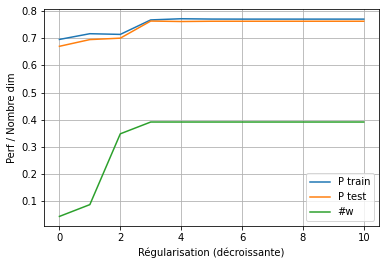

In [23]:
#Sélection de variables avec le classifieur RIDGE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score


clf = RidgeClassifier()
all_a = 10**(np.linspace(10,-10,11))
print(all_a)
p_a = [] # perf en apprentissage
p_t = [] # perf en test
wc = []  # cardinal des coefficients non nul

for a in all_a:
    mod = RidgeClassifier(alpha=a)
    mod.fit(X_train_split, Y_train_split)
# Compléter l'évaluation et le comptage des coefficients non nuls 
    yhat = mod.predict(X_train_split) 
    true=Y_train_split
    p_a_new=accuracy_score(true, yhat)
    (p_a).append(p_a_new)
    wc.append(np.where(np.abs(mod.coef_ >1e-5), 1 ,0).mean())
print(f"perf en apprentissage: accuracy: {p_a}")


for a in all_a:
    mod = RidgeClassifier(alpha=a)
    mod.fit(X_train_split, Y_train_split)
#Compléter l'évaluation et le comptage des coefficients non nuls 
    yhat = mod.predict(X_val) 
    true=Y_val
    p_t_new=accuracy_score(true, yhat)
    (p_t).append(p_t_new)
#      print(np.where(np.abs(mod.coef_ >1e-5), mod.coef_, 0))
print(f"perf en test: accuracy: {p_a}")

plt.figure()
plt.plot(p_a)
plt.plot(p_t)
plt.plot(wc)
plt.grid()
plt.xlabel('Régularisation (décroissante)')
plt.ylabel('Perf / Nombre dim')
plt.legend(['P train', 'P test', '#w'])

#on sélectionne alpha=10000 qui permet d'avoir une bonne performance avec une contrainte sur les coefficients
mod = RidgeClassifier(alpha=10000)
mod.fit(X_train_split, Y_train_split)
yhat = mod.predict(X_train_split) 
true=Y_train_split
p_a_new=accuracy_score(true, yhat)
print("pour la valeur d'alpha selectionnee, perf en test: accuracy:", {p_a_new})
print(np.where(np.abs(mod.coef_ >1e-5), mod.coef_, 0))
for i in (np.where(np.abs(mod.coef_ >1e-5))):
    print("variables sélectionnees par le modele:", mod.feature_names_in_[i])

In [24]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(C=0.1, max_iter=10000) 
selector = SequentialFeatureSelector(estimator, n_features_to_select=15)
selector = selector.fit(X_train_split, Y_train_split)

print(selector.get_support())

# il est ensuite possible de filtrer les données:

# X_train_select= selector.transform(X_train)
# X_train_select_split = selector.transform(X_train_split)
# X_val_select=selector.transform(X_val)
# print("Ancienne dimensions : ",X_train_split.shape)
# print("Nouvelles dimensions : ",X_train_select_split.shape)

[ True  True  True  True  True  True False  True False  True False False
 False  True  True  True  True False False  True False  True  True]


On a obtenu une sélection de variables avec SequentialFeatureSelector, 
mais lorsqu'on a testé les variables sélectionnées dans les classifieurs présentés à la section suivante, on n'a jamais observé d'amélioration des performances (résultats non présentés ici, car alourdissant le notebook). 
On abandonne donc la sélection de variables pour la suite.

# Classifieurs et performances sur le set de training et le set de validation

On teste différents classifieurs pour voir les performances: SVM, Logistic regression, Randomforest, XGBoost. 

In [25]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


mod = SVC(kernel="linear", max_iter=10000)
mod.fit(X_train_split,Y_train_split)
Yhat_train=mod.predict(X_train_split)
Yhat_val=mod.predict(X_val)
auc=roc_auc_score(Y_val, mod.decision_function(X_val))
print("modele SVM lineaire: accuraccy sur train set:", accuracy_score(Y_train_split, Yhat_train))
print("modele SVM lineaire: accuraccy sur validation set:", accuracy_score(Y_val, Yhat_val))
print("\n linear SVM: precision, recall, et f1 scores class 1: sur validation set:", "\n", 
      precision_score(Y_val, Yhat_val), "\n", recall_score(Y_val, Yhat_val), "\n", f1_score(Y_val, Yhat_val))
print("\n linear SVM: precision, recall, et f1 scores class 0: sur validation set", "\n", 
       precision_score(Y_val, Yhat_val, pos_label=0), "\n", recall_score(Y_val, Yhat_val, pos_label=0), 
       "\n", f1_score(Y_val, Yhat_val, pos_label=0))
print("AUC modele SVM lineaire", auc)
print(auc)

mod2 = svm.SVC(gamma = 10)
mod2.fit(X_train_split,Y_train_split)
Yhat_train=mod2.predict(X_train_split)
Yhat_val=mod2.predict(X_val)
auc=roc_auc_score(Y_val, mod2.decision_function(X_val))
print("\n modele SVM: accuraccy sur train set:", accuracy_score(Y_train_split, Yhat_train))
print("modele SVM: accuraccy sur validation set:", accuracy_score(Y_val, Yhat_val))
print("\n SVM: precision, recall, et f1 scores class 1: sur validation set:", "\n", 
      precision_score(Y_val, Yhat_val), "\n", recall_score(Y_val, Yhat_val), "\n", f1_score(Y_val, Yhat_val))
print("\n SVM: precision, recall, et f1 scores class 0: sur validation set", "\n", 
       precision_score(Y_val, Yhat_val, pos_label=0), "\n", recall_score(Y_val, Yhat_val, pos_label=0), 
       "\n", f1_score(Y_val, Yhat_val, pos_label=0))
print("AUC modele SVM", auc)
print(auc)



C:\Users\jacqueno\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


modele SVM lineaire: accuraccy sur train set: 0.6998626373626373
modele SVM lineaire: accuraccy sur validation set: 0.6831648658069014

 linear SVM: precision, recall, et f1 scores class 1: sur validation set: 
 0.6223055295220243 
 0.9280223619846262 
 0.7450210378681626

 linear SVM: precision, recall, et f1 scores class 0: sur validation set 
 0.8598639455782313 
 0.43949930458970793 
 0.5816843074091118
AUC modele SVM lineaire 0.7873869290078911
0.7873869290078911

 modele SVM: accuraccy sur train set: 0.9512362637362637
modele SVM: accuraccy sur validation set: 0.6598117811084001

 SVM: precision, recall, et f1 scores class 1: sur validation set: 
 0.819971870604782 
 0.4074074074074074 
 0.5443510737628385

 SVM: precision, recall, et f1 scores class 0: sur validation set 
 0.6070435588507878 
 0.9109874826147427 
 0.728587319243604
AUC modele SVM 0.7242309423076737
0.7242309423076737


Les performances de SVM linéaire sont mauvaises sur le training set et le valdiation set, les performances de SVM avec kernel rbf sont mauvaises sur le validation set (mais pas sur le training set cette fois, heureusement). 
On ne retient donc pas le classifieur pour notre projet.  

modele LR: accuraccy sur train set: 0.7960164835164835
modele LR: accuraccy sur validation set: 0.7947019867549668

 LR: precision, recall, et f1 scores class 1: sur validation set: 
 0.7723156532988357 
 0.8343815513626834 
 0.802149815250252

 LR: precision, recall, et f1 scores class 0: sur validation set 
 0.8208616780045351 
 0.7552155771905424 
 0.7866714958348424
AUC modele LR 0.8786929396659892
0.8786929396659892
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] [[-9.30988350e-03 -1.47095913e-03  5.24692650e-04  5.26050385e-04
  -1.89464868e-03 -1.94009556e-03 -4.86570144e-01  1.05599345e+00
   3.17932831e-02  1.24081556e+00  4.66624196e-01  1.15797508e-01
   1.87948815e-02 -9.34575779e-02 -2.55292642e-01  4.74546238e-01
   9.33479795e-01 -1.67375907e-02 -3.51219311e-01  6.91913214e-02
  -2.42821399e-01 -9.92982467e-03 -4.84891323e-01]]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column    

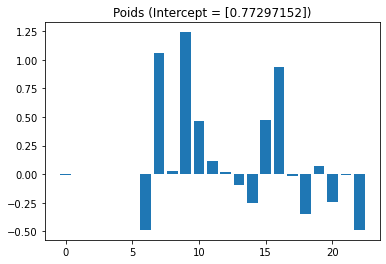

In [26]:
from sklearn.linear_model import LogisticRegression
mod4 = LogisticRegression(C=0.1, max_iter=10000)
mod4.fit(X_train_split,Y_train_split)
Yhat_train=mod4.predict(X_train_split)
Yhat_val=mod4.predict(X_val)
auc=roc_auc_score(Y_val, mod4.decision_function(X_val))
print("modele LR: accuraccy sur train set:", accuracy_score(Y_train_split, Yhat_train))
print("modele LR: accuraccy sur validation set:", accuracy_score(Y_val, Yhat_val))
print("\n LR: precision, recall, et f1 scores class 1: sur validation set:", "\n", 
      precision_score(Y_val, Yhat_val), "\n", recall_score(Y_val, Yhat_val), "\n", f1_score(Y_val, Yhat_val))
print("\n LR: precision, recall, et f1 scores class 0: sur validation set", "\n", 
       precision_score(Y_val, Yhat_val, pos_label=0), "\n", recall_score(Y_val, Yhat_val, pos_label=0), 
       "\n", f1_score(Y_val, Yhat_val, pos_label=0))
print("AUC modele LR", auc)
print(auc)

print(np.arange(X_train.shape[1]),mod4.coef_)
plt.figure()
plt.bar(np.arange(X_train.shape[1]), mod4.coef_[0])
plt.title('Poids (Intercept = '+str(mod4.intercept_)+')')
X_train.info()

In [27]:
# Foret aléatoire sklearn
from sklearn.ensemble import RandomForestClassifier

mod3 =  RandomForestClassifier()
mod3.fit(X_train_split,Y_train_split)
Yhat_train=mod3.predict(X_train_split)
Yhat_val=mod3.predict(X_val)
print("modele RF: accuraccy sur train set:", accuracy_score(Y_train_split, Yhat_train))
print("modele RF: accuraccy sur validation set:", accuracy_score(Y_val, Yhat_val))
print("\n modele RF: precision, recall, et f1 scores class 1: sur validation set:", "\n", 
      precision_score(Y_val, Yhat_val), "\n", recall_score(Y_val, Yhat_val), "\n", f1_score(Y_val, Yhat_val))
print("\n modele RF: precision, recall, et f1 scores class 0: sur validation set", "\n", 
       precision_score(Y_val, Yhat_val, pos_label=0), "\n", recall_score(Y_val, Yhat_val, pos_label=0), 
       "\n", f1_score(Y_val, Yhat_val, pos_label=0))


modele RF: accuraccy sur train set: 0.951407967032967
modele RF: accuraccy sur validation set: 0.7915650052283025

 modele RF: precision, recall, et f1 scores class 1: sur validation set: 
 0.8011569052783803 
 0.7742837176799441 
 0.7874911158493247

 modele RF: precision, recall, et f1 scores class 0: sur validation set 
 0.7826379542395693 
 0.8087621696801113 
 0.7954856361149111


In [28]:
# XGboost
import xgboost as xgb 
bst = xgb.XGBClassifier().fit(X_train_split,Y_train_split) 
Yhat_train = bst.predict(X_train_split)
Yhat_val=bst.predict(X_val)
print("modele XG: accuraccy sur train set:", accuracy_score(Y_train_split, Yhat_train))
print("modele XG: accuraccy sur validation set:", accuracy_score(Y_val, Yhat_val))
print("\n modele XG: precision, recall, et f1 scores class 1: sur validation set:", "\n", 
      precision_score(Y_val, Yhat_val), "\n", recall_score(Y_val, Yhat_val), "\n", f1_score(Y_val, Yhat_val))
print("\n modele XG: precision, recall, et f1 scores class 0: sur validation set", "\n", 
       precision_score(Y_val, Yhat_val, pos_label=0), "\n", recall_score(Y_val, Yhat_val, pos_label=0), 
       "\n", f1_score(Y_val, Yhat_val, pos_label=0))


modele XG: accuraccy sur train set: 0.904532967032967
modele XG: accuraccy sur validation set: 0.793307772743116

 modele XG: precision, recall, et f1 scores class 1: sur validation set: 
 0.7763852242744064 
 0.822501747030049 
 0.7987784187309128

 modele XG: precision, recall, et f1 scores class 0: sur validation set 
 0.8122690317812269 
 0.7642559109874826 
 0.7875313507703332


Parmi les classifieurs testés, 3 classifieurs ont de bonnes performances de prédiction sur le set de validation (79-80% de F1 score sur les 2 classes "Transported"/"Not transported": logistic regression, random forest et XGBoost. On choisit de garder random forest et XGboost pour optimiser les performances et faire nos prédictions finales sur l'ensemble de test. 

# Optimisation des performances 


On cherche les hyperparamètres optimaux de nos 2 classifieurs sélectionnés, puis on les fait tourner avec les hyperparamètres optimaux pour faire la prédiction sur les données test (qui ont été prétraitées précédemment de la même manière que les données de training). 

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
Best parameter (CV score=0.801):
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
modele RF: accuraccy sur train set: 0.8434065934065934
modele RF: accuraccy sur validation set: 0.7995817357964448

 modele RF: precision, recall, et f1 scores class 1: sur validation set: 
 0.7935528120713305 
 0.8085255066387141 
 0.8009691934925579

 modele RF: precision, recall, et f1 scores class 0: sur validation set 
 0.8058114812189936 
 0.7906815020862309 
 0.7981747981747983
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  --

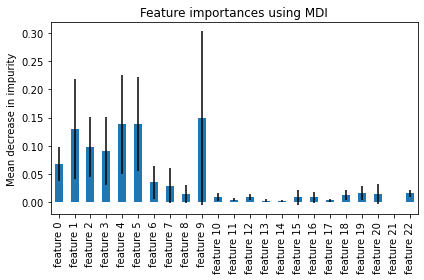

In [29]:
#grid search sur train set pour hyperparamètres optimaux de random forest 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

classif = RandomForestClassifier()
print(classif.get_params().keys())

grid = {'max_depth': [3, 5, 10], 
        'min_samples_split': [2, 5, 10],
        'n_estimators': [10, 100, 300]}

search = GridSearchCV(classif, grid)
search.fit(X_train_split, Y_train_split)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

#classifieur avec les hyperparamètres optimaux
rf =  RandomForestClassifier(n_estimators=300, max_depth=10,min_samples_split=10)
rf.fit(X_train_split,Y_train_split)
Yhat_train=rf.predict(X_train_split)
Yhat_val=rf.predict(X_val)
print("modele RF: accuraccy sur train set:", accuracy_score(Y_train_split, Yhat_train))
print("modele RF: accuraccy sur validation set:", accuracy_score(Y_val, Yhat_val))
print("\n modele RF: precision, recall, et f1 scores class 1: sur validation set:", "\n", 
      precision_score(Y_val, Yhat_val), "\n", recall_score(Y_val, Yhat_val), "\n", f1_score(Y_val, Yhat_val))
print("\n modele RF: precision, recall, et f1 scores class 0: sur validation set", "\n", 
       precision_score(Y_val, Yhat_val, pos_label=0), "\n", recall_score(Y_val, Yhat_val, pos_label=0), 
       "\n", f1_score(Y_val, Yhat_val, pos_label=0))
#Analyse de l'importance des features 
feature_names = [f"feature {i}" for i in range(X_train_split.shape[1])]
importances = rf.feature_importances_
rf_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
fig, ax = plt.subplots()
rf_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

X_train.info()

#Prédire l'étiquette du set de test
Yhat_realtest=rf.predict(X_test)
print("% de transported:", (np.where(Yhat_realtest==1, 1, 0).sum())/len(Yhat_realtest))
print("prediction des 3 premières étiquettes de X_test", Yhat_realtest[0:10])

In [30]:
#OPTUNA pour XGBoost
!pip install optuna
import optuna
import warnings
warnings.filterwarnings('ignore')



def objective(trial):
    
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = xgb.XGBClassifier(**params)
    optuna_model.fit(X_train_split, Y_train_split)

    # Make predictions
    y_pred = optuna_model.predict(X_val)

    # Evaluate predictions
    accuracy = accuracy_score(Y_val, y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    



[I 2023-01-21 18:45:02,307] A new study created in memory with name: no-name-bddf903f-7822-4596-a104-9d7c611c0b0c
[I 2023-01-21 18:45:02,902] Trial 0 finished with value: 0.7455559428372255 and parameters: {'max_depth': 6, 'learning_rate': 0.7552190411939347, 'n_estimators': 429, 'min_child_weight': 6, 'gamma': 7.730299110183565e-07, 'subsample': 0.03395456907969134, 'colsample_bytree': 0.035697995344983906, 'reg_alpha': 0.031257185752052635, 'reg_lambda': 1.0207241829498547e-08}. Best is trial 0 with value: 0.7455559428372255.
[I 2023-01-21 18:45:03,961] Trial 1 finished with value: 0.7706517950505403 and parameters: {'max_depth': 3, 'learning_rate': 0.03755182954868316, 'n_estimators': 489, 'min_child_weight': 5, 'gamma': 1.6691200442663598e-06, 'subsample': 0.6121527592784757, 'colsample_bytree': 0.059665046279256326, 'reg_alpha': 0.1499649484981331, 'reg_lambda': 7.212449533435944e-06}. Best is trial 1 with value: 0.7706517950505403.
[I 2023-01-21 18:45:04,526] Trial 2 finished wit

[I 2023-01-21 18:45:15,436] Trial 19 finished with value: 0.7995817357964448 and parameters: {'max_depth': 3, 'learning_rate': 0.057443685254978165, 'n_estimators': 290, 'min_child_weight': 2, 'gamma': 0.013637952326385646, 'subsample': 0.2788583779374638, 'colsample_bytree': 0.965898835604072, 'reg_alpha': 5.439855430213595e-06, 'reg_lambda': 2.900801983721751e-06}. Best is trial 3 with value: 0.8006273963053329.
[I 2023-01-21 18:45:16,270] Trial 20 finished with value: 0.7922621122342279 and parameters: {'max_depth': 6, 'learning_rate': 0.12797452500779338, 'n_estimators': 290, 'min_child_weight': 1, 'gamma': 0.6789115794914881, 'subsample': 0.12495873023468906, 'colsample_bytree': 0.2881654671383594, 'reg_alpha': 6.733398645027498e-06, 'reg_lambda': 3.098081589101606e-07}. Best is trial 3 with value: 0.8006273963053329.
[I 2023-01-21 18:45:16,919] Trial 21 finished with value: 0.8009759498082956 and parameters: {'max_depth': 3, 'learning_rate': 0.05710127613516922, 'n_estimators': 2

[I 2023-01-21 18:45:34,461] Trial 38 finished with value: 0.7971418612757059 and parameters: {'max_depth': 3, 'learning_rate': 0.0715870628141105, 'n_estimators': 445, 'min_child_weight': 8, 'gamma': 0.003716487216035163, 'subsample': 0.5212660698369641, 'colsample_bytree': 0.7840128761348956, 'reg_alpha': 9.536457728905016e-08, 'reg_lambda': 2.140656160890083e-07}. Best is trial 21 with value: 0.8009759498082956.
[I 2023-01-21 18:45:35,695] Trial 39 finished with value: 0.7999302892994075 and parameters: {'max_depth': 4, 'learning_rate': 0.10604458857445187, 'n_estimators': 273, 'min_child_weight': 3, 'gamma': 0.015275577050495813, 'subsample': 0.7250484805093874, 'colsample_bytree': 0.46353992845310105, 'reg_alpha': 6.33130487322888e-07, 'reg_lambda': 1.1846865769957834e-07}. Best is trial 21 with value: 0.8009759498082956.
[I 2023-01-21 18:45:37,067] Trial 40 finished with value: 0.7967933077727432 and parameters: {'max_depth': 4, 'learning_rate': 0.16230220605869997, 'n_estimators'

[I 2023-01-21 18:45:51,932] Trial 57 finished with value: 0.8020216103171837 and parameters: {'max_depth': 7, 'learning_rate': 0.057324650200325934, 'n_estimators': 121, 'min_child_weight': 3, 'gamma': 0.001393045434900203, 'subsample': 0.5987119674553318, 'colsample_bytree': 0.825516489870249, 'reg_alpha': 7.899534384867254e-08, 'reg_lambda': 3.5514517793985245e-08}. Best is trial 54 with value: 0.8069013593586616.
[I 2023-01-21 18:45:52,522] Trial 58 finished with value: 0.8020216103171837 and parameters: {'max_depth': 7, 'learning_rate': 0.045373072524120324, 'n_estimators': 95, 'min_child_weight': 3, 'gamma': 0.0013079577742087629, 'subsample': 0.5622728220270311, 'colsample_bytree': 0.6038015153394217, 'reg_alpha': 9.178548644401679e-08, 'reg_lambda': 3.396452291737232e-08}. Best is trial 54 with value: 0.8069013593586616.
[I 2023-01-21 18:45:53,446] Trial 59 finished with value: 0.7999302892994075 and parameters: {'max_depth': 9, 'learning_rate': 0.08162028994843018, 'n_estimator

[I 2023-01-21 18:46:07,335] Trial 76 finished with value: 0.7995817357964448 and parameters: {'max_depth': 5, 'learning_rate': 0.08189074633303679, 'n_estimators': 164, 'min_child_weight': 1, 'gamma': 0.004693430433022183, 'subsample': 0.699506081874361, 'colsample_bytree': 0.2904558036722622, 'reg_alpha': 1.034076993025966e-08, 'reg_lambda': 2.3821491810577905e-07}. Best is trial 54 with value: 0.8069013593586616.
[I 2023-01-21 18:46:08,264] Trial 77 finished with value: 0.8027187173231091 and parameters: {'max_depth': 5, 'learning_rate': 0.05274558158193164, 'n_estimators': 205, 'min_child_weight': 2, 'gamma': 0.0007192072629086895, 'subsample': 0.49825566123443016, 'colsample_bytree': 0.5463425134104075, 'reg_alpha': 4.963434374153189e-08, 'reg_lambda': 4.8714505737173734e-08}. Best is trial 54 with value: 0.8069013593586616.
[I 2023-01-21 18:46:09,438] Trial 78 finished with value: 0.8030672708260718 and parameters: {'max_depth': 5, 'learning_rate': 0.06660360892751477, 'n_estimato

[I 2023-01-21 18:46:24,684] Trial 95 finished with value: 0.7985360752875567 and parameters: {'max_depth': 4, 'learning_rate': 0.108827672019563, 'n_estimators': 218, 'min_child_weight': 2, 'gamma': 0.010478447272456958, 'subsample': 0.9928487360070729, 'colsample_bytree': 0.34766423918052486, 'reg_alpha': 3.918629932230383e-08, 'reg_lambda': 1.883410718656707e-07}. Best is trial 79 with value: 0.807598466364587.
[I 2023-01-21 18:46:25,516] Trial 96 finished with value: 0.8041129313349599 and parameters: {'max_depth': 4, 'learning_rate': 0.07967969471756363, 'n_estimators': 260, 'min_child_weight': 2, 'gamma': 0.020372897831692233, 'subsample': 0.6520199649335193, 'colsample_bytree': 0.4977762541921177, 'reg_alpha': 2.7138786573265146e-08, 'reg_lambda': 8.392063556112807e-08}. Best is trial 79 with value: 0.807598466364587.
[I 2023-01-21 18:46:26,326] Trial 97 finished with value: 0.8020216103171837 and parameters: {'max_depth': 4, 'learning_rate': 0.09529920844910925, 'n_estimators': 

Number of finished trials: 100
Best trial:
  Value: 0.807598466364587
  Params: 
    max_depth: 5
    learning_rate: 0.06556832136713336
    n_estimators: 205
    min_child_weight: 2
    gamma: 0.0008278106771512973
    subsample: 0.49262948234295867
    colsample_bytree: 0.6947476078875474
    reg_alpha: 2.331422847464891e-07
    reg_lambda: 1.1406833456728475e-07


modele XG: accuraccy sur train set: 0.8495879120879121
modele XG: accuraccy sur validation set: 0.807598466364587

 modele XG: precision, recall, et f1 scores class 1: sur validation set: 
 0.7900990099009901 
 0.8364779874213837 
 0.8126272912423625

 modele XG: precision, recall, et f1 scores class 0: sur validation set 
 0.827178729689808 
 0.7788595271210014 
 0.8022922636103152


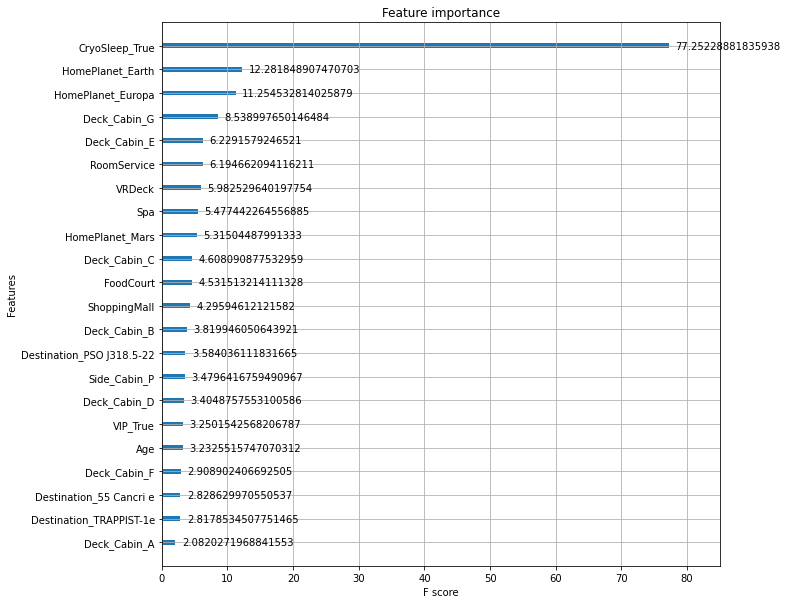

% de transported: 0.5274725274725275
prediction des 10 premières étiquettes de X_test [1 0 1 1 1 0 1 1 1 1]


In [31]:
    
#classifieur avec les hyperparamètres optimaux
params=trial.params
# bst = xgb.XGBClassifier(max_depth=5, learning_rate=0.1802910551017453, n_estimators=132, 
#                         min_child_weight=9, gamma=1.0039068601817166e-05, subsample=0.6290480238027396, 
#                         colsample_bytree=0.603299870101957, reg_alpha=1.5582521124885588e-06, reg_lambda=0.00113833286567642).fit(X_train_split,Y_train_split) 
bst = xgb.XGBClassifier(**params).fit(X_train_split,Y_train_split) 
Yhat_train = bst.predict(X_train_split)
Yhat_val=bst.predict(X_val)
print("modele XG: accuraccy sur train set:", accuracy_score(Y_train_split, Yhat_train))
print("modele XG: accuraccy sur validation set:", accuracy_score(Y_val, Yhat_val))
print("\n modele XG: precision, recall, et f1 scores class 1: sur validation set:", "\n", 
      precision_score(Y_val, Yhat_val), "\n", recall_score(Y_val, Yhat_val), "\n", f1_score(Y_val, Yhat_val))
print("\n modele XG: precision, recall, et f1 scores class 0: sur validation set", "\n", 
       precision_score(Y_val, Yhat_val, pos_label=0), "\n", recall_score(Y_val, Yhat_val, pos_label=0), 
       "\n", f1_score(Y_val, Yhat_val, pos_label=0))
#Analyse de l'importance des features 
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(bst, ax=ax,importance_type='gain')
plt.show()

#Prédire l'étiquette du set de test
Yhat_realtest=bst.predict(X_test)
print("% de transported:", (np.where(Yhat_realtest==1, 1, 0).sum())/len(Yhat_realtest))
print("prediction des 10 premières étiquettes de X_test", Yhat_realtest[0:10])


Avec nos deux classifieurs sélectionnés on prédit 51-52% de personnes "transported" dans les données test. On observe que la variable Cryosleep est importante (feature importance) pour la prédiciton dans les  modèles, conformément à ce qu'on avait pu observer précédemment.